In [1]:
#Import packages 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns


In [2]:
# import tensile tests data from raw archive
# sample_number = input("Which sample do you want to analyze?")
# am = "am"+ sample_number + ".csv"
# path = os.path.join('mech_test/data', am)
data = pd.read_csv('data/am1.csv', sep = ';', header = 1, usecols = ['(s)', '(mm)', '(kN)', '(mm/mm)', '(MPa)'], skiprows = 4, encoding = 'latin_1')

In [3]:
strain = data['(mm/mm)']
stress = data['(MPa)']
load = data['(kN)']
elong = data['(mm)']
time = data['(s)']

In [4]:
# plot the engineering stress strain curve

def engineering_ss(strain, stress):
    
    %matplotlib inline
    plt.figure(figsize = (16, 9))
    plt.plot(strain, stress, 'r-')
    plt.xlabel('strain (mm/mm)')
    plt.ylabel('stress (MPa)')

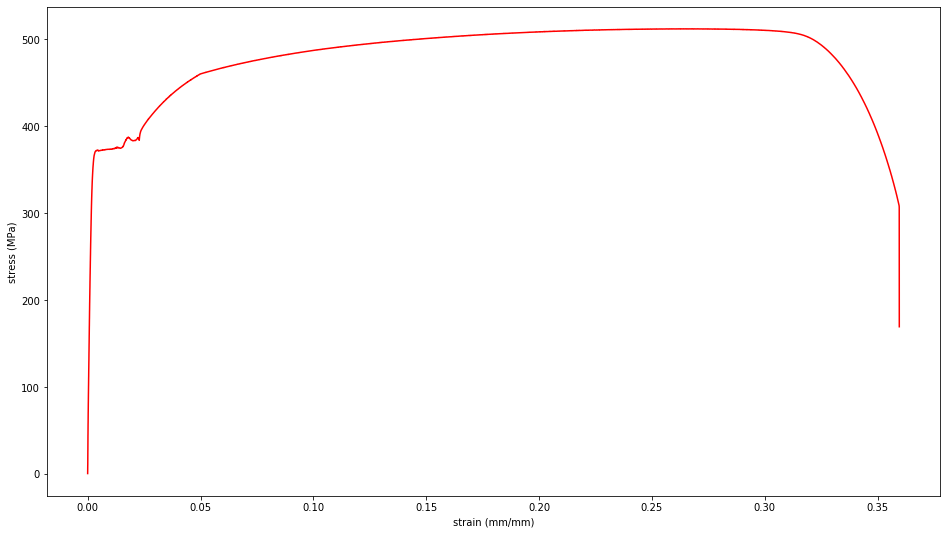

In [5]:
engineering_ss(strain, stress)

In [ ]:
def yielding:
    
    

In [14]:
def de(strain):
    deps = []
    for i in range(len(strain)):
        if i == 0:
            dx = 1E-6
        elif strain[i]==strain[i-1]:
            dx = 1E-6
        else:    
            dx = strain[i]-strain[i-1]
        
        deps.append(dx)

    return deps
    
def ds(stress):
    dsig = []
    for i in range(len(stress)):
        if i == 0:
            dy = 1E-6
        elif stress[i]==stress[i-1]:
            dy = 1E-6
        else:    
            dy = stress[i]-stress[i-1]
        
        dsig.append(dy)

    return dsig

def derivative(dx, dy):
    deriv = []
    for i in range(len(dx)):
        diff = dy[i]/dx[i]
        if diff < -1E2:
            diff = 0
        deriv.append(diff)
    
    return deriv

In [15]:
dx = de(strain)
dy = ds(stress)
data['ds/de']=derivative(dx, dy)

Text(0, 0.5, 'ds/de')

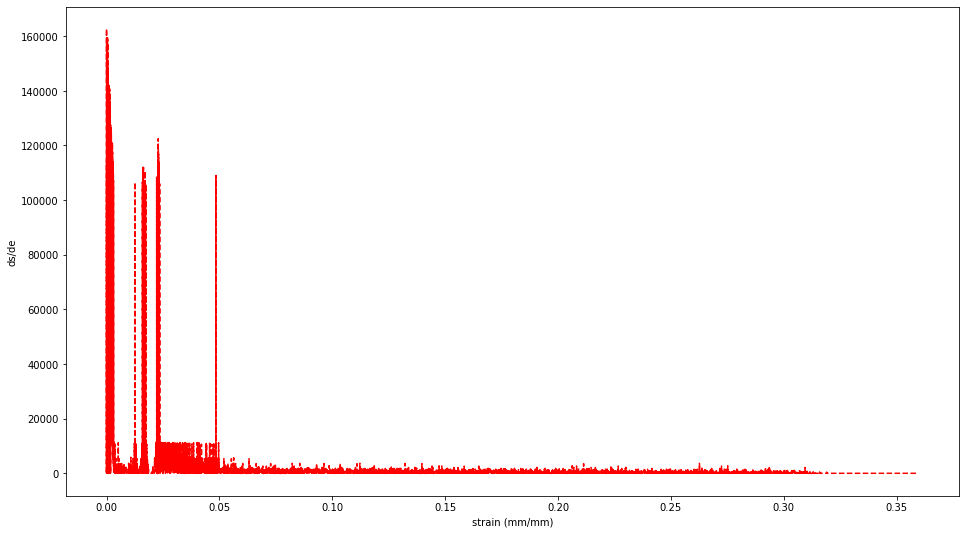

In [19]:
%matplotlib inline
plt.figure(figsize = (16, 9))
plt.plot(strain, data['ds/de'], 'r--')
plt.xlabel('strain (mm/mm)')
plt.ylabel('ds/de')

In [10]:
data.tail()

,(s),(mm),(kN),(mm/mm),(MPa),ds/de
9315,441.560,26.48925,5.67592,0.35958,238.90273,-1.631689e+07
9316,441.562,26.48950,5.26969,0.35959,221.80440,-1.709833e+06
9317,441.564,26.48967,4.85387,0.35959,204.30197,-1.750243e+07
9318,441.566,26.48985,4.43555,0.35959,186.69476,-1.760721e+07
9319,441.568,26.49003,4.02013,0.35960,169.20963,-1.748513e+06
